In [13]:
# Pre-processing

In [1]:
# Import necessary packages
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Using TensorFlow backend.
/home/psa/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/psa/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/psa/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/psa/.local/lib/python3.7/site-packages/tensorflow/python/framework/d

In [2]:
chestxrays = pd.read_csv('./data/chestxrays.csv')
chestxrays.head()

,filename,covid-19
0,../covid-chestxray-dataset/images/auntminnie-a...,1
1,../covid-chestxray-dataset/images/auntminnie-b...,1
2,../covid-chestxray-dataset/images/auntminnie-c...,1
3,../covid-chestxray-dataset/images/auntminnie-d...,1
4,../covid-chestxray-dataset/images/nejmc2001573...,1


In [3]:
# Concatenate folder and filename into one single col


In [4]:
# Create train/test set
X_train_val, X_test = train_test_split(chestxrays, test_size=0.1, random_state=42)
X_train, X_val = train_test_split(X_train_val, test_size=0.2, random_state=42)

In [20]:
# normalize images Train set
sample_size = 100
batch_size = 8
seed = 42
target_w = 320
target_h = 320
    
image_generator = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization= True)
    
train_generator = image_generator.flow_from_dataframe(
    dataframe=X_train, 
    x_col='filename', 
    y_col='covid-19', 
    class_mode="raw", 
    batch_size=batch_size, 
    shuffle=True, 
    seed=seed, 
    target_size=(target_w,target_h)
)


Found 218 validated image filenames.


In [21]:
# normalize images val set
val_generator = image_generator.flow_from_dataframe(
    dataframe=X_val, 
    x_col='filename', 
    y_col='covid-19', 
    class_mode="raw", 
    batch_size=batch_size, 
    shuffle=True, 
    seed=seed, 
    target_size=(target_w,target_h)
)

Found 55 validated image filenames.


In [22]:
# normalize images test set
test_generator = image_generator.flow_from_dataframe(
    dataframe=X_test, 
    x_col='filename', 
    y_col='covid-19', 
    class_mode="raw", 
    batch_size=batch_size, 
    shuffle=True, 
    seed=seed, 
    target_size=(target_w,target_h)
)



Found 31 validated image filenames.


In [8]:
# Create model

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [40]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (320, 320, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
history =  classifier.fit_generator(train_generator,steps_per_epoch = 200, epochs = 20,validation_data = val_generator,validation_steps = 50)

Epoch 1/20
200/200 [==============================] - 113s 566ms/step - loss: 0.1716 - accuracy: 0.9448 - val_loss: 0.9683 - val_accuracy: 0.8193
Epoch 2/20
200/200 [==============================] - 113s 563ms/step - loss: 5.5963e-05 - accuracy: 1.0000 - val_loss: 6.0303e-04 - val_accuracy: 0.8244
Epoch 3/20
200/200 [==============================] - 115s 573ms/step - loss: 1.8054e-05 - accuracy: 1.0000 - val_loss: 2.0941 - val_accuracy: 0.8117
Epoch 4/20
200/200 [==============================] - 116s 578ms/step - loss: 8.3653e-06 - accuracy: 1.0000 - val_loss: 2.2374 - val_accuracy: 0.8193
Epoch 5/20
200/200 [==============================] - 116s 578ms/step - loss: 4.3884e-06 - accuracy: 1.0000 - val_loss: 1.5007 - val_accuracy: 0.8142
Epoch 6/20
200/200 [==============================] - 115s 576ms/step - loss: 2.7708e-06 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 0.8015
Epoch 7/20
200/200 [==============================] - 115s 577ms/step - loss: 1.8407e-06 - accuracy:

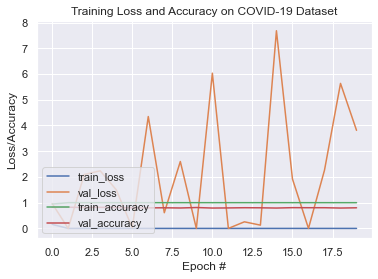

In [42]:
N = 20
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [47]:
predicted_vals = classifier.predict_generator(test_generator, steps = len(test_generator))

In [48]:
from sklearn.metrics import confusion_matrix
predicted_vals[predicted_vals >= 0.5] = 1
predicted_vals[predicted_vals < 0.5] = 0

cm=confusion_matrix(X_test['covid-19'],predicted_vals)
print(cm)

from sklearn.metrics import roc_auc_score

print(roc_auc_score(X_test['covid-19'], predicted_vals))


[[ 6  9]
 [ 6 10]]
0.5125


In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(320, 320, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

In [24]:
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

In [25]:
for layer in baseModel.layers:
    layer.trainable = False

In [26]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("[INFO] training head...")
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    validation_data=val_generator,
    validation_steps=10,
    epochs=EPOCHS
)


[INFO] compiling model...
[INFO] training head...
Epoch 1/25


ValueError: A target array with shape (8, 1) was passed for an output of shape (None, 2) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.